In [4]:
import networkx as nx
import numpy as np

In [94]:
I = 10
K = 2
num_misinfo = 3
num_info = 3
G = nx.watts_strogatz_graph(n=I, k=K, p=0.1, seed=12)
adjacency_matrix = nx.to_numpy_array(G)
#fill the first num_info rows with nans
adjacency_matrix[:num_info, :] = np.nan
#fill the last num_misinfo rows with nans
adjacency_matrix[-num_misinfo:, :] = np.nan
np.fill_diagonal(adjacency_matrix, 1)
# remove parallel edges
adjacency_matrix[adjacency_matrix > 1] = 1
#transform zeros to np.nans
adjacency_matrix[adjacency_matrix == 0] = np.nan


In [97]:
x = np.array([0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871,
 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871,
 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871,
 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871,
 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871,
 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871,
 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871,
 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871, 0.11481871,
 0.11481871, 0.11481871, 0.25      , 0.25      , 0.24998053, 0.25001955,
 0.24999989, 0.25001933, 0.25      , 0.24999989, 0.25001933, 0.24999978,
 0.25      , 0.25001933, 0.24998053, 0.24998053, 0.24998053, 0.25,
 0.24998053, 0.24998053, 0.24998053, 0.25001955, 0.24998053, 0.25001955,
 0.24998053, 0.24998053, 0.24998053, 0.25      , 0.25      , 0.25,
 0.25      , 0.24998053, 0.24999989, 0.25003896, 0.24998053, 0.25001933,
 0.00550112, 0.00550112, 0.00550112, 0.00550112, 0.00550112, 0.00550112,
 0.00550112, 0.00550112, 0.00550112, 0.00550112, 0.00550112, 0.00550112,
 0.00550112, 0.00550112])

In [99]:
np.prod(x)

7.884466586341047e-100

In [74]:
filled_with_one = np.copy(prior_variance_matrix)
filled_with_one[np.isnan(prior_variance_matrix)] = 1
numerator = np.transpose(np.prod(filled_with_one, axis=1) * np.ones((I, I)))/ filled_with_one
# then get the product of the fillex matrix over rows


In [75]:
adjacency_matrix

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1., nan],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1., nan,  1., ...,  1.,  1.,  1.]])

In [85]:
product = np.prod(filled_with_one, axis=1)
#then replace the position in the numerator with 0 where x was nan,as it is invariant to sum
filled_with_zeros = np.copy(numerator)
filled_with_zeros[np.isnan(prior_variance_matrix)] = 0
#if some rows are below 1e-64, convert them to 1e-64
# if np.any(np.sum(filled_with_zeros, axis=1) < 1e-64):
#     filled_with_zeros[np.sum(filled_with_zeros, axis=1) < 1e-64] = 1e-64
# then divide the numerator by the sum of filled_with_zeros over rows 
a = np.transpose(np.transpose(filled_with_zeros)/np.sum(filled_with_zeros, axis=1))
b = product/np.sum(filled_with_zeros, axis=1)

In [86]:
a.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [3]:
# small world
I = 10
network_density = 1
K = int(round((I - 1)*network_density))
prob_rewire = 0.01
set_seed = 0
G = nx.watts_strogatz_graph(n=I, k=K, p=prob_rewire, seed=set_seed)  # Watts–Strogatz small-world graph,watts_strogatz_graph( n, k, p[, seed])

In [4]:
def create_adjacency_matrix(I, network_density, K, prob_rewire, set_seed, network_type):
        if network_type == "scale_free":
            G = nx.scale_free_graph(I)
        elif network_type == "small-world":
            G = nx.watts_strogatz_graph(n=I, k=K, p=prob_rewire, seed=set_seed)  # Watts–Strogatz small-world graph,watts_strogatz_graph( n, k, p[, seed])
        elif network_type == "SBM":
            block_sizes = [int(I/2), int(I/2)]  # Adjust the sizes as needed
            # Create the stochastic block model. we keep the same network density in the same block 
            # and a tenth of the network density between blocks
            block_probs = np.asarray([[network_density, network_density/10],[network_density/10, network_density]])  # Make the matrix symmetric
            G = nx.stochastic_block_model(block_sizes, block_probs, seed=set_seed)
        adjacency_matrix = nx.to_numpy_array(G)
        #fill the diagonal with 1s
        np.fill_diagonal(adjacency_matrix, 1)
        # remove parallel edges
        adjacency_matrix[adjacency_matrix > 1] = 1
        #transform zeros to np.nans
        adjacency_matrix[adjacency_matrix == 0] = np.nan
        return adjacency_matrix,G


In [5]:
adjacency_matrix, G = create_adjacency_matrix(I, network_density, K, prob_rewire, set_seed, "small-world")

In [6]:
a, b, c = 0, 0, 0

In [7]:
# scale free
SF = nx.scale_free_graph(I)
SF_adjacency_matrix = nx.to_numpy_array(SF)
# cap at 1 
#SF_adjacency_matrix[SF_adjacency_matrix > 1] = 1
# fill diagonal with 1
np.fill_diagonal(SF_adjacency_matrix, 1)

#check if it is symmetric
#assert np.allclose(G.adjacency_matrix, G.adjacency_matrix.T, atol=1e-8), "Adjacency matrix is not symmetric"

In [8]:
SF_adjacency_matrix[SF_adjacency_matrix > 1] = 1
SF_adjacency_matrix

array([[1., 1., 1., 1., 0., 1., 0., 0., 0., 1.],
       [1., 1., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

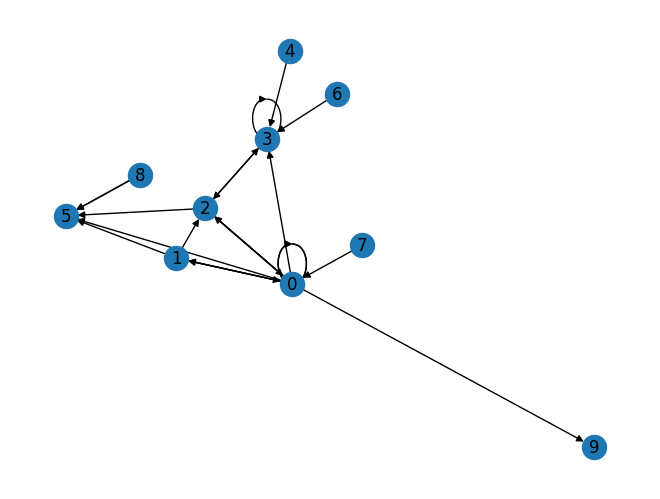

In [9]:
nx.draw(SF, with_labels=True)

In [10]:
#barabasi albert
BA = nx.barabasi_albert_graph(I, 2)
BA_adjacency_matrix = nx.to_numpy_array(BA)

#check if it is symmetric
assert np.allclose(BA_adjacency_matrix, BA_adjacency_matrix.T, atol=1e-8), "Adjacency matrix is not symmetric"

In [11]:
block_sizes = [int(I/2), int(I/2)]  # Adjust the sizes as needed
num_blocks = len(block_sizes)
# Create the stochastic block model
block_probs = np.asarray([[0.5, 0.01],[0.01, 0.5]])  # Make the matrix symmetric
G = nx.stochastic_block_model(block_sizes, block_probs, seed=set_seed)
#make diagonal 1
np.fill_diagonal(nx.to_numpy_array(G), 1)
#chnage zeros to nans
G_adjacency_matrix = nx.to_numpy_array(G)
G_adjacency_matrix[G_adjacency_matrix == 0] = np.nan

In [12]:
G_adjacency_matrix[np.isnan(G_adjacency_matrix)] = 2
G_adjacency_matrix

array([[2., 2., 2., 1., 1., 2., 2., 2., 2., 2.],
       [2., 2., 2., 1., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 1., 1., 2., 2., 2., 2., 2.],
       [1., 1., 1., 2., 2., 2., 2., 2., 2., 2.],
       [1., 2., 1., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 1., 2., 2., 1.],
       [2., 2., 2., 2., 2., 1., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 1., 2., 1., 2., 2.]])

In [13]:
#current matrix
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# obtain a matrix of the same dimension where each entry in the row is the product of all elements in the row
sigma = np.transpose(np.prod(x, axis=1) * np.ones((x.shape[0], x.shape[1])))/x
sigma


array([[ 6.,  3.,  2.],
       [30., 24., 20.],
       [72., 63., 56.]])

In [14]:
def compute_weighting_matrix(x):
    # first fill the nan to one since they are invariant to multiplication
    filled_with_one = np.copy(x)
    filled_with_one[np.isnan(x)] = 1
    numerator = np.transpose(np.prod(filled_with_one, axis=1) * np.ones((x.shape[0], x.shape[1])))/ (filled_with_one)
    prod = np.prod(filled_with_one, axis=1)
    #then replace the position in the numerator with 0 where x was nan
    filled_with_zeros = np.copy(numerator)
    filled_with_zeros[np.isnan(x)] = 0
    # then divide the numerato by the sum of filled_with_zeros over rows
    return np.transpose(np.transpose(numerator)/np.sum(filled_with_zeros, axis=1)), prod/np.sum(filled_with_zeros, axis=1)
    

In [15]:
def compute_posterior_mean_vector(x, y):
        # multiply the weighting matrix by the prior mean matrix, then sum over the rows
        return np.sum(x*y, axis = 1)

In [16]:
prior_mean_matrix = np.array([[1, 0, 0.5], [0, 0.6, 0.5], [0, 0, 0.5]])
prior_variance_matrix = np.array([[0.0, np.nan, 0.1], [np.nan, 0.2, 0.1], [0.3, 0.2, 0.1]]) + 1e-14
weighting_matrix, posterior_variance = compute_weighting_matrix(prior_variance_matrix)
compute_posterior_mean_vector(weighting_matrix, prior_mean_matrix)

array([1.        , 0.53333333, 0.27272727])

In [18]:
x = np.array([1,2,np.nan, 4])

In [23]:
np.nanprod(x)

8.0

In [36]:
from scipy.stats import kurtosis

# generate an ar(1) process
beta = 0.5
n = 1000
x = np.zeros(n)
x[0] = np.random.normal(0, 0.1)
for i in range(1, n):
    x[i] = beta * x[i-1] + np.random.normal(0, 0.1)


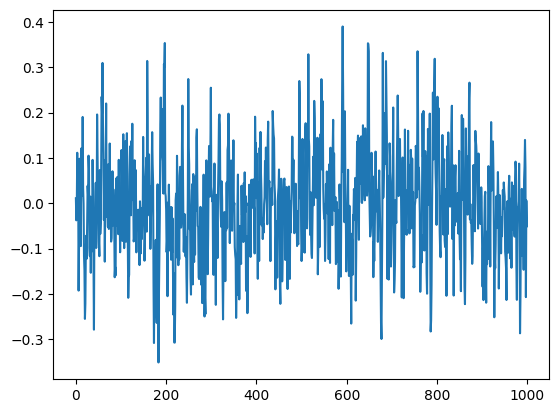

In [37]:
import matplotlib.pyplot as plt
plt.plot(x)

208.33421085270632
379.5009758056252 -0.5777378429329658 -285.85998915364905


916

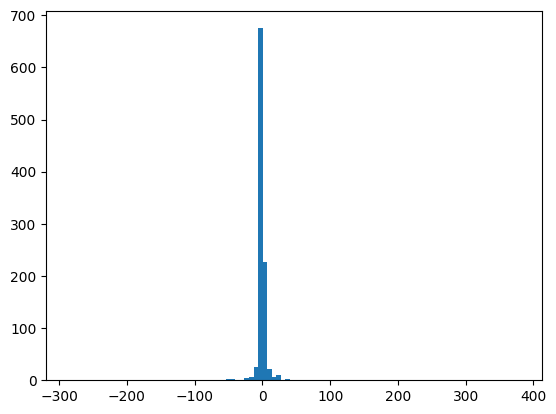

In [42]:
#compute returns as x[t]/x[t-1]
returns = x[1:]/x[:-1] - 1
#drop the first element and last element
returns = returns[:-1]
returns = returns[1:]
plt.hist(returns, bins=100)
print(kurtosis(returns))
print(max(returns), np.mean(returns), min(returns))
# position of the maximum
np.argmax(returns)

In [250]:
# change only the first and last diagonal to nan
np.fill_diagonal(weighting_matrix[:2,:2], np.nan)


In [211]:
filled_with_one = np.copy(prior_variance_matrix)
filled_with_one[np.isnan(prior_variance_matrix)] = 1
numerator = np.transpose(np.prod(filled_with_one, axis=1) * np.ones((3, 3)))/filled_with_one
filled_with_zeros = np.copy(numerator)
filled_with_zeros[np.isnan(prior_variance_matrix)] = 0
np.transpose(np.transpose(numerator)/np.sum(filled_with_zeros, axis=1))

array([[0.25      , 0.075     , 0.75      ],
       [0.06666667, 0.33333333, 0.66666667],
       [0.18181818, 0.27272727, 0.54545455]])

In [1]:
x = np.array([])
np.append(x, 1)
x

NameError: name 'np' is not defined

In [74]:
def create_category_vector(I, num_info, num_misinfo):
            # 0 indicates uninformed agents, 1 indicates informed agents, -1 indicates misinformed agents
            # intialize vector of zeros of length I
            category_vector = np.zeros(I)
            # select the first num_info indices to be 1
            category_vector[: num_info] = 1
            # select the last num_misinfo indices to be -1
            category_vector[-num_misinfo :] = -1
            return category_vector

x = create_category_vector(10, 3, 2)
print(x)

[ 1.  1.  1.  0.  0.  0.  0.  0. -1. -1.]


In [252]:
prior_vector = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [254]:
new_vector = np.copy(prior_vector)
np.where(new_vector > 0.5, 1, new_vector)

array([0.1, 0.2, 0.3, 0.4, 0.5, 1. , 1. , 1. , 1. , 1. ])